In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score as  OA, confusion_matrix as CM
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [11]:
# Create data
X, y = load_digits(return_X_y=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.98, train_size=0.02, random_state=0)

# Fit
model = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LR(random_state=0))])

model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
print(OA(y_test, y_pred_test))

0.699205448354143


We can try several polynomial transformation. We define a dictionnary for the results that will be converted to dataFrame later.

In [3]:
res = {"OA":[], "Order":[], "RandomState":[]}
for rs in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rs)
    for p in [1, 2]: # p = 3 can be very time consuming -> you can only test p in [1,2] for faster procesing
            model = Pipeline([
                ("tranformer", PolynomialFeatures(p)),
                ("scaler", StandardScaler()),
                ("classifier", LR(random_state=0, max_iter=100))])
            model.fit(X_train, y_train)
            y_pred_test = model.predict(X_test)
            res["OA"].append(OA(y_test, y_pred_test))
            res["Order"].append(p)
            res["RandomState"].append(rs)

/home/mfauvel/anaconda3/envs/teaching-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mfauvel/anaconda3/envs/teaching-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [4]:
df = pd.DataFrame.from_dict(res)
df.groupby(["Order"])["OA"].mean()

Order
1    0.963515
2    0.976974
Name: OA, dtype: float64

In [5]:
df.groupby(["Order"])["OA"].std()

Order
1    0.004885
2    0.005058
Name: OA, dtype: float64

In [6]:
print(CM(y_test, y_pred_test))

[[87  0  0  0  1  0  1  0  0  0]
 [ 0 86  0  0  0  0  0  0  1  0]
 [ 0  0 89  0  0  0  0  0  0  0]
 [ 0  0  0 94  0  0  0  0  0  0]
 [ 0  1  0  0 83  0  0  1  0  2]
 [ 0  0  0  0  0 93  0  0  0  1]
 [ 1  0  0  0  0  0 83  0  0  0]
 [ 0  0  0  0  0  0  0 91  1  1]
 [ 0  0  1  0  0  3  0  0 81  0]
 [ 0  0  0  1  0  1  0  1  0 94]]


In [7]:
t = np.where(y_test != y_pred_test)[0]
t.size
print(t)

[ 48  97 189 288 311 345 413 433 452 462 548 578 616 650 656 661 703 775]


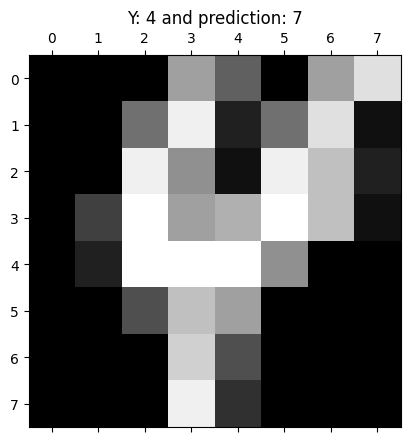

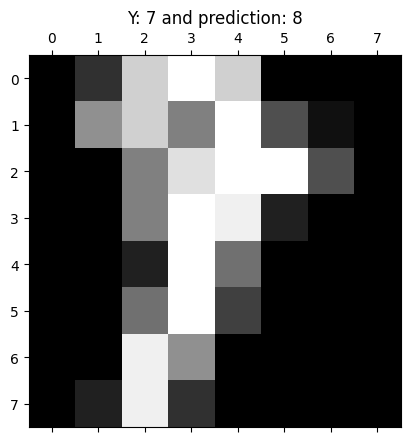

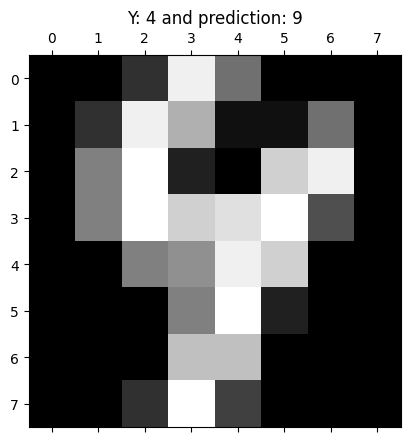

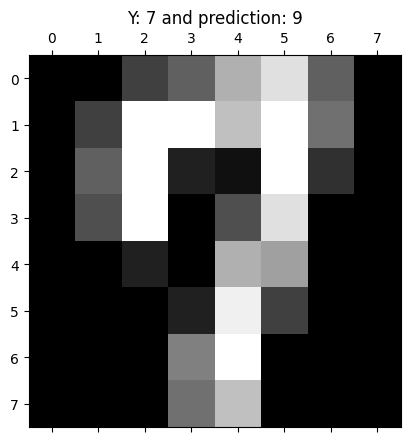

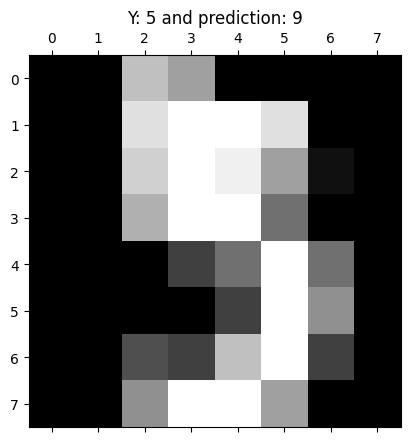

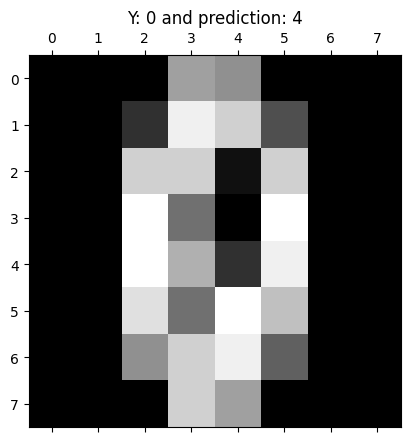

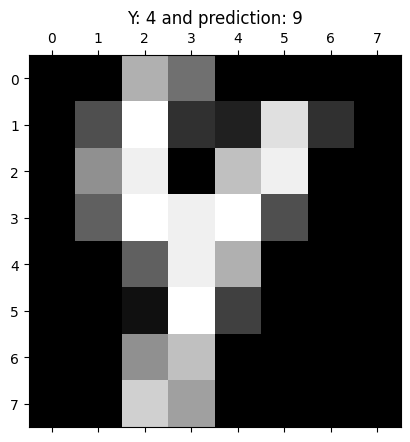

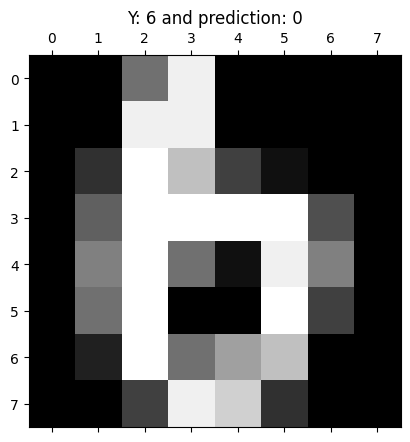

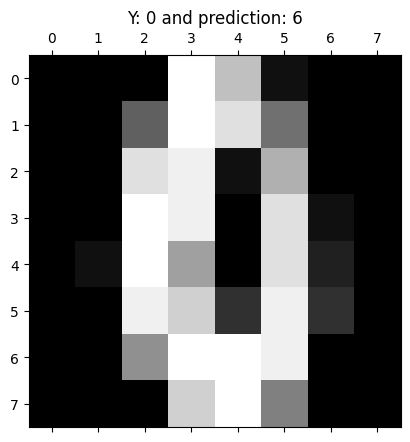

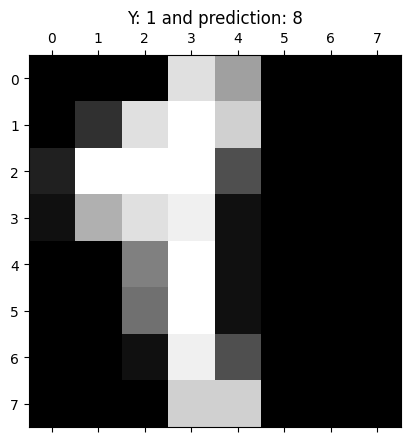

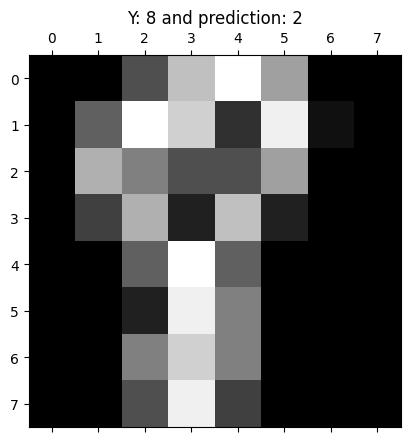

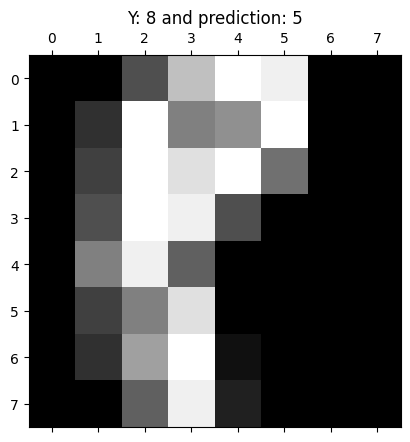

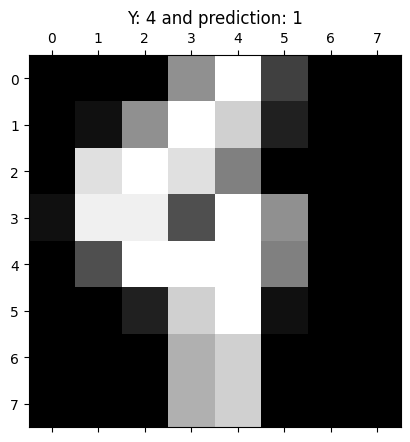

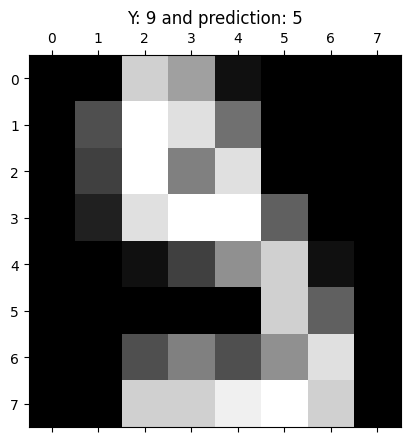

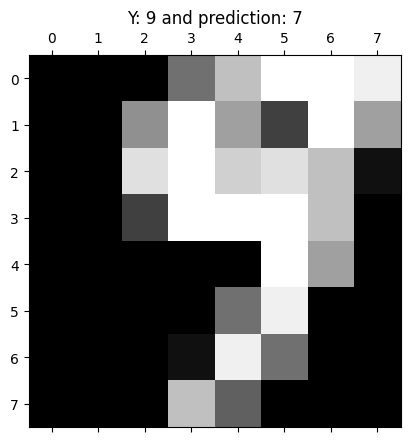

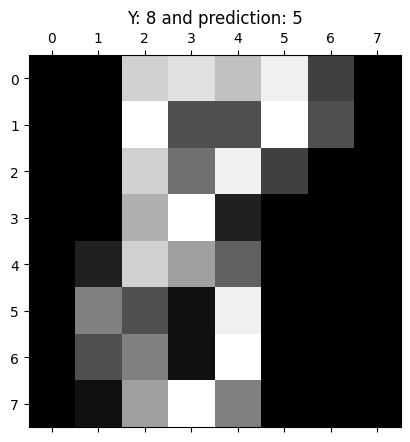

In [8]:
for t_ in t:
    plt.matshow(X_test[t_, :].reshape(8, 8), cmap='gray')
    plt.title(f"Y: {y_test[t_]} and prediction: {y_pred_test[t_]}")

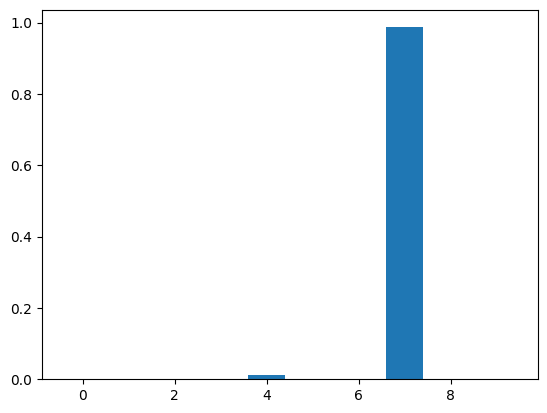

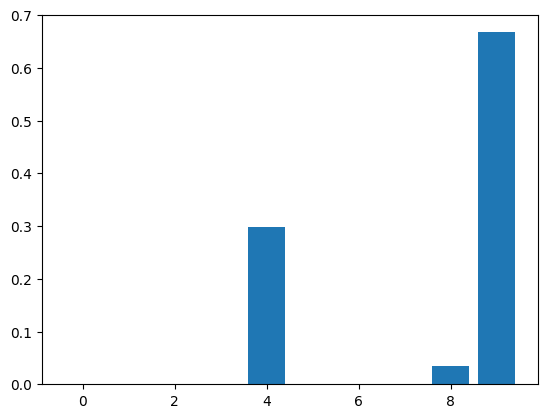

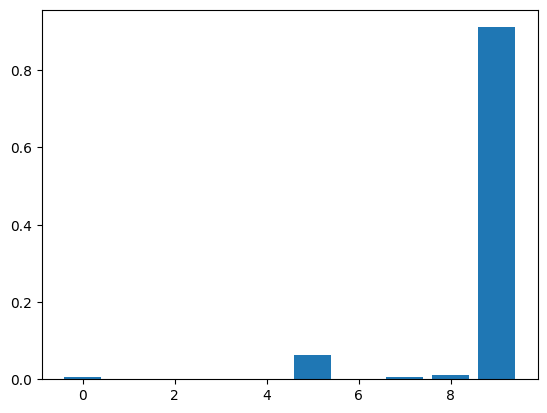

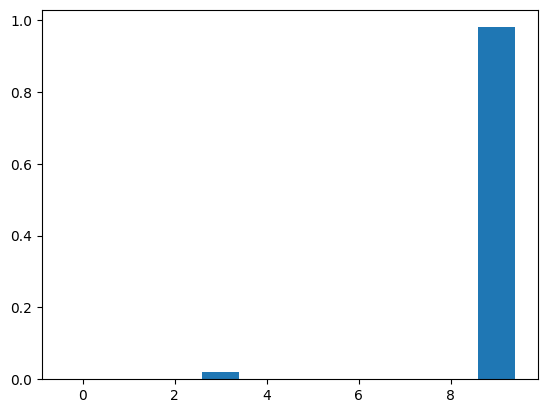

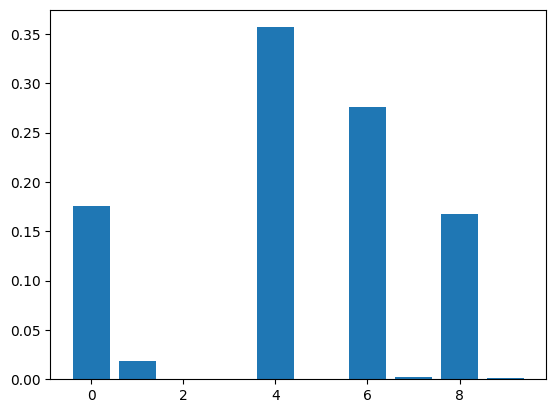

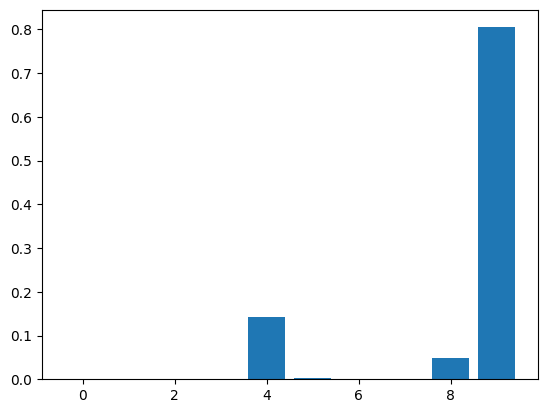

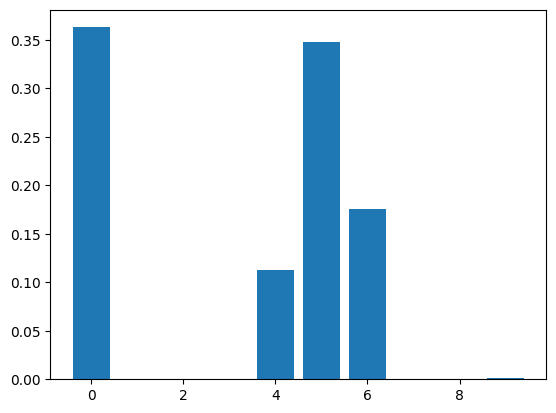

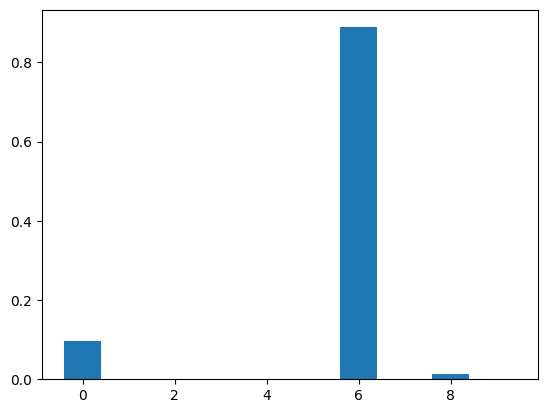

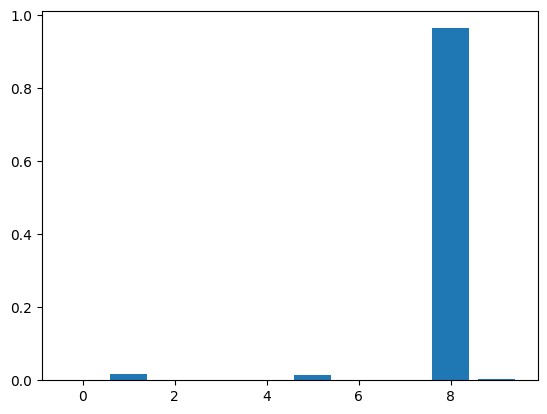

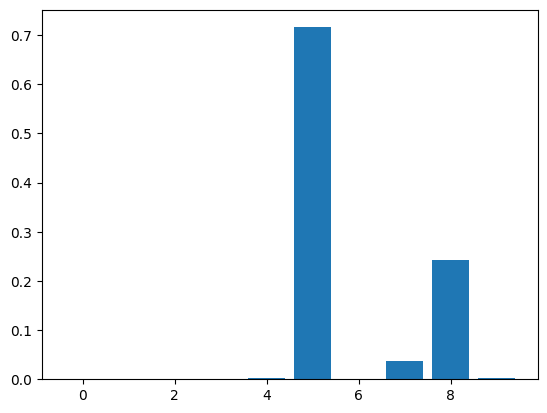

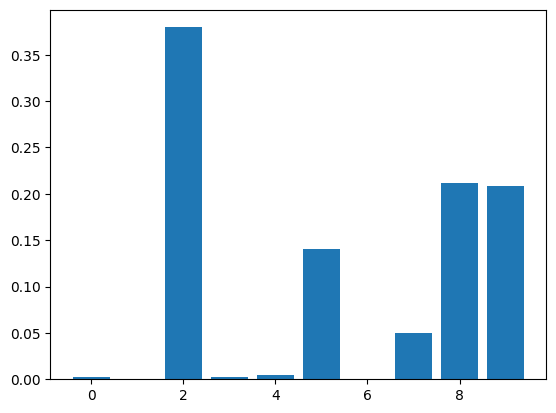

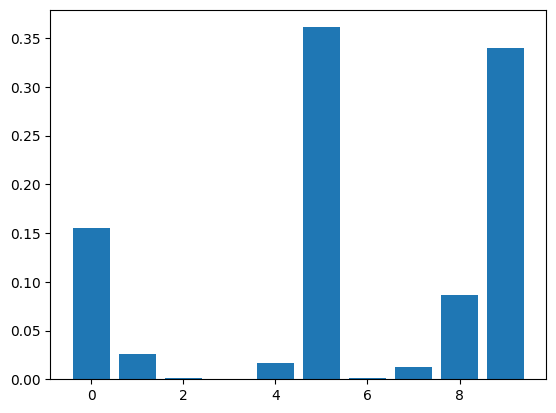

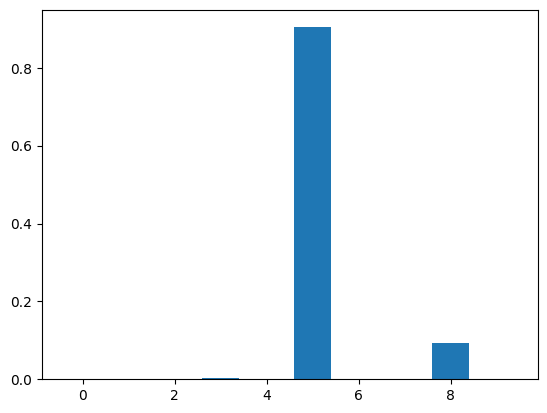

In [9]:
proba_test = model.predict_proba(X_test)
for t_ in t:
    plt.figure()
    plt.bar(range(10), proba_test[t_,:])

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.54      0.70       177
           1       0.61      0.87      0.72       178
           2       0.96      0.15      0.27       175
           3       0.48      0.93      0.63       178
           4       0.88      0.77      0.83       177
           5       0.61      0.94      0.74       177
           6       0.84      0.88      0.86       176
           7       0.81      0.82      0.82       175
           8       0.72      0.64      0.68       171
           9       0.76      0.44      0.56       178

    accuracy                           0.70      1762
   macro avg       0.77      0.70      0.68      1762
weighted avg       0.77      0.70      0.68      1762

